# Prerequisites

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Install and Imports**

In [ ]:
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# lemmatizer
!pip install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer
from banglakit import lemmatizer as lem
from banglakit.lemmatizer import BengaliLemmatizer
lemmatizer = BengaliLemmatizer()



from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/banglakit/lemmatizer.git to /tmp/pip-install-wffgg3wk/banglakit-lemmatizer_01e0a06d20ec4354bd7f626593f54c0a
  Running command git clone --filter=blob:none --quiet https://github.com/banglakit/lemmatizer.git /tmp/pip-install-wffgg3wk/banglakit-lemmatizer_01e0a06d20ec4354bd7f626593f54c0a
  Resolved https://github.com/banglakit/lemmatizer.git to commit f94d8f8dfe06fac70fa151a46069888acffe8870
  Preparing metadata (setup.py) ... done
  Created wheel for banglakit-lemmatizer: filename=banglakit_lemmatizer-0.0.1-py3-none-any.whl size=117720 sha256=4141b1637e7ae0402f16a421011dcf169a700e5c555ed08e35e51a6f2de67f2d
  Stored in directory: /tmp/pip-ephem-wheel-cache-jksw20nx/wheels/5c/37/da/19d74ad562fbc1c185b4b43d702c7e0e1983289e9224a1fe1c
Successfully built banglakit-lemmatizer


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, plot_confusion_matrix, roc_curve, roc_auc_score, classification_report

In [ ]:
from sklearn.pipeline import Pipeline

### **Dataset Read**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/PR/Dataset/augmentationDf.csv")
df

,sentence,target,type,hateSpeech
0,... ঐ ইন্দুর তোই মরছ নাই?,ind,callToViolence,1
1,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,ind,callToViolence,1
2,মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,ind,callToViolence,1
3,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খা...,female,callToViolence,1
4,২য় মীর জাফরের মুখে মুতে দে...,male,callToViolence,1
...,...,...,...,...
41680,সাব্বির একটু উগ্রবাদী এটা সবাই জানে কিন্তু প্র...,common,general,0
41681,সাব্বির এখন উইকেটে একটু সময় নিয়ে খেলে যেটা এ...,common,general,0
41682,সাব্বির এটা কি সত্যি?আমি খেলব না তোমার সাথে আর,common,general,0
41683,সাব্বির এর পিছনে লাগছে কেনো বুঝলাম না? প্রথম স...,common,general,0


In [ ]:
df['hateSpeech'] = df['hateSpeech'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41685 entries, 0 to 41684
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   sentence    41685 non-null  object  
 1   target      41685 non-null  object  
 2   type        41685 non-null  object  
 3   hateSpeech  41685 non-null  category
dtypes: category(1), object(3)
memory usage: 1017.9+ KB


# ML Models

### **Preprocess for run over ML Models**

In [ ]:
train = df.head(30000)
test = df.tail(5000)

In [ ]:
train['text_lem'] = [''.join([lemmatizer.lemmatize(text, pos=lem.POS_PROPN) for text in lis]) for lis in train['sentence']]
test['text_lem'] = [''.join([lemmatizer.lemmatize(text, pos=lem.POS_PROPN) for text in lis]) for lis in test['sentence']]

<ipython-input-9-b79142c1ace3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['text_lem'] = [''.join([lemmatizer.lemmatize(text, pos=lem.POS_PROPN) for text in lis]) for lis in train['sentence']]
<ipython-input-9-b79142c1ace3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['text_lem'] = [''.join([lemmatizer.lemmatize(text, pos=lem.POS_PROPN) for text in lis]) for lis in test['sentence']]


In [ ]:
train['text_lem']

0                           ... -PRON- ইন্দুর তোই মরছ নাই?
1        #গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে -PRON-ত...
2                     মুরগি চোরের পাছায় ডুকবি আর মারবি।।।
3        ১৮ কোটির চোদা খাওয়া শেষে -PRON-খন ১৫০কোটির চো...
4                           ২য় মীর জাফরের মুখে মুতে দে...
                               ...                        
29995    খারাপ কমেন্ট করবেন না কেউ প্লিজআমরা যারা খারাপ...
29996    খারাপ করার সময় টের পাও না দিন চোরের -PRON-ক দ...
29997    খারাপ কাজ সবাই করে যারটা সামনে আসে সবাই তাকে ছ...
29998    খারাপ খেললে কি চুমা দিবো গালি দিয়েছে তো কি হয...
29999                          খারাপ খেললে গালি দিতেই পারে
Name: text_lem, Length: 30000, dtype: object

**Train test separation**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(train['text_lem'], train['hateSpeech'])

In [ ]:
vect = TfidfVectorizer(ngram_range = (1,4)).fit(X_train)

In [ ]:
vect_transformed_X_train = vect.transform(X_train)
vect_transformed_X_test = vect.transform(X_test)

## LogisticRegression

#### Basic LR

In [ ]:
import sklearn.linear_model as lm
modelLR = lm.LogisticRegression().fit(vect_transformed_X_train,y_train)

In [ ]:
predictionsLR = modelLR.predict(vect_transformed_X_test)

In [ ]:
sum(predictionsLR==1)

6185

In [ ]:
len(y_test)

7500

In [ ]:
confusion_matrix_LR = confusion_matrix(y_test, 
                                     predictionsLR)

print('confusion_matrix: \n', confusion_matrix_LR)

confusion_matrix: 
 [[ 946 1099]
 [ 369 5086]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


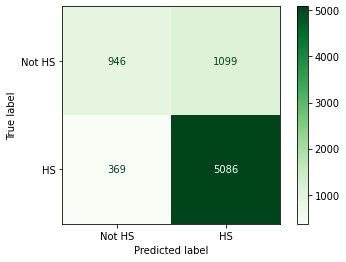

In [ ]:
import matplotlib.pyplot as plt

plot_confusion_matrix(modelLR, 
                      vect_transformed_X_test, 
                      y_test, 
                      display_labels=["Not HS", "HS"],
                      cmap='Greens')
plt.show()

In [ ]:
TN = confusion_matrix_LR[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_LR[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_LR[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_LR[1,1]
print("True Positives = ", TP)

True Negatives =  946
False Negatives =  369
False Positives =  1099
True Positives =  5086


In [ ]:
accuracy_LR = np.round(accuracy_score(y_test, 
                           predictionsLR), 2)
precision_LR = np.round(precision_score(y_test, 
                                      predictionsLR), 2)
recall_LR= np.round(recall_score(y_test, 
                                predictionsLR), 2)
f1_score_LR = np.round(f1_score(y_test, 
                               predictionsLR), 2)


print('Accuracy = ', np.round(accuracy_LR*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_LR*100, 2),"%") #Higher Better
print("Recall = ", recall_LR*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_LR*100, 2),"%") #Higher Better

Accuracy =  80.0 %
Precision =  82.0 %
Recall =  93.0 %
f1 score =  87.0 %


In [ ]:
print(classification_report(y_test, predictionsLR))

              precision    recall  f1-score   support

           0       0.72      0.46      0.56      2045
           1       0.82      0.93      0.87      5455

    accuracy                           0.80      7500
   macro avg       0.77      0.70      0.72      7500
weighted avg       0.79      0.80      0.79      7500



In [ ]:
roc_auc_score(y_test, modelLR.predict_proba(vect_transformed_X_test)[:, 1])

0.8487276427045911

In [ ]:
y = pd.DataFrame()

In [ ]:
y['probability'] = modelLR.predict_proba(vect_transformed_X_test)[:, 1]

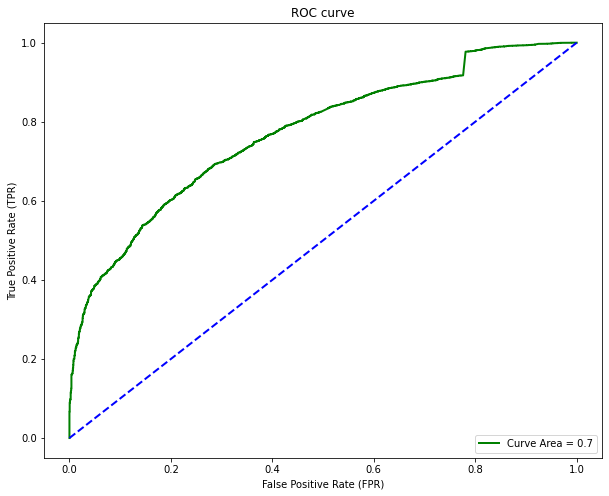

In [ ]:
import numpy as np

FPR, TPR, thr = roc_curve(y_test, 
                          y['probability'])
auc_lr = np.round(roc_auc_score(y_test, 
                             predictionsLR), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_lr))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc_lr

0.72

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,1.999951,0.0,0.000000
1,0.999951,0.0,0.006783
2,0.999526,0.0,0.006966
3,0.999475,0.0,0.007333
4,0.999261,0.0,0.008066


#### Grid Search and Cross Validation

In [ ]:
# import the class
import sklearn.linear_model as lm

modelLR = lm.LogisticRegression()
print(modelLR.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [ ]:
parameters = {'criterion': ['gini'],
              'max_depth': [None],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'min_samples_split': [2, 9, 10, 11]}

# def LogisticR_penalty():    
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

grid_values = {'penalty': ['l1', 'l2', 'elasticnet', None], 'class_weight': ['dict', 'balanced', None], 'C': [0.1], 'random_state': [22]}

model = lm.LogisticRegression()

# from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model,
                           param_grid = grid_values,
                           scoring="f1",
                           cv=10,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(vect_transformed_X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver 

In [ ]:
# predictionsKNN = modelKNN.predict(vect_transformed_X_test)
y_pred = grid_result.predict(vect_transformed_X_test)

In [ ]:
#Best hyperparameters in the grid search
grid_result.best_params_

{'C': 0.1, 'class_weight': 'dict', 'penalty': 'l2', 'random_state': 22}

In [ ]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.847651,0.850402,0.848548,0.850181,0.844525,0.848292,0.001704,1
9,0.847651,0.850402,0.848548,0.850181,0.844525,0.848292,0.001704,1
5,0.828736,0.829625,0.825346,0.818968,0.839309,0.826040,0.007411,3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


Index(['split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
confusion_matrix_LR_gscv = confusion_matrix(y_test, 
                                     y_pred)

print('confusion_matrix: \n', confusion_matrix_LR_gscv)

confusion_matrix: 
 [[ 246 1799]
 [  73 5382]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


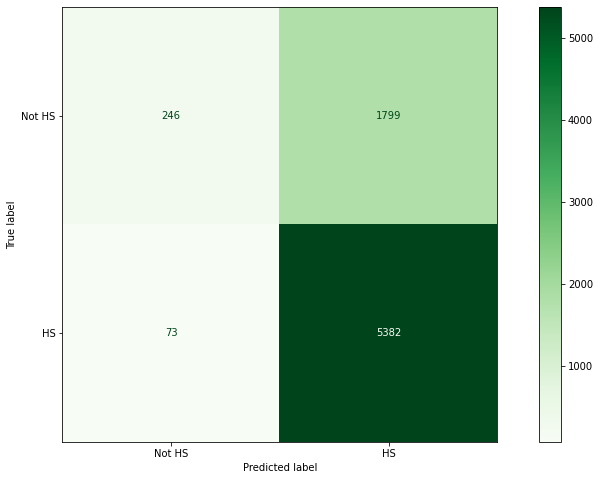

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(grid_result,
                      vect_transformed_X_test, 
                      y_test, 
                      display_labels=["Not HS", "HS"],
                      cmap='Greens',
                     ax = ax)
plt.show()

In [ ]:
TN_LR_gscv = confusion_matrix_LR_gscv[0,0]
print("True Negatives = ", TN_LR_gscv)

FN_LR_gscv = confusion_matrix_LR_gscv[1,0]
print("False Negatives = ", FN_LR_gscv)

FP_LR_gscv = confusion_matrix_LR_gscv[0,1]
print("False Positives = ", FP_LR_gscv)

TP_LR_gscv = confusion_matrix_LR_gscv[1,1]
print("True Positives = ", TP_LR_gscv)

True Negatives =  246
False Negatives =  73
False Positives =  1799
True Positives =  5382


In [ ]:
accuracy_LR_gscv = np.round(accuracy_score(y_test, 
                           y_pred), 2)
precision_LR_gscv = np.round(precision_score(y_test, 
                                      y_pred), 2)
recall_LR_gscv = np.round(recall_score(y_test, 
                                y_pred), 2)
f1_score_LR_gscv = np.round(f1_score(y_test, 
                               y_pred), 2)


print('Accuracy = ', np.round(accuracy_LR_gscv*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_LR_gscv*100, 2),"%") #Higher Better
print("Recall = ", recall_LR_gscv*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_LR_gscv*100, 2),"%") #Higher Better

Accuracy =  75.0 %
Precision =  75.0 %
Recall =  99.0 %
f1 score =  85.0 %


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.12      0.21      2045
           1       0.75      0.99      0.85      5455

    accuracy                           0.75      7500
   macro avg       0.76      0.55      0.53      7500
weighted avg       0.76      0.75      0.68      7500



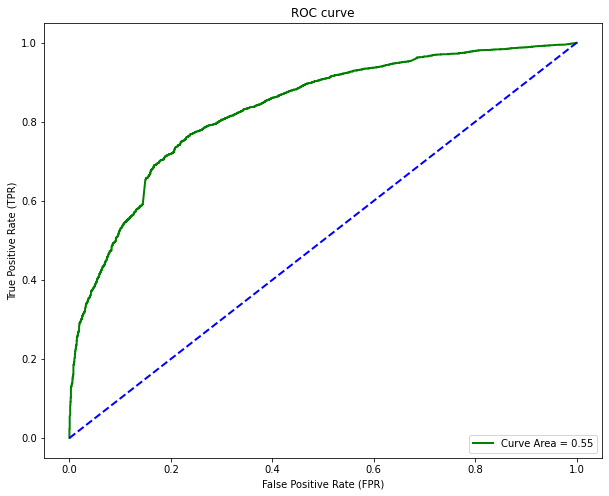

In [ ]:
FPR, TPR, thr = roc_curve(y_test, grid_result.predict_proba(vect_transformed_X_test)[:,1])

auc_LR_gscv = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_LR_gscv))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc_LR_gscv

0.55

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,1.984638,0.0,0.000000
1,0.984638,0.0,0.006783
2,0.965614,0.0,0.007149
3,0.962833,0.0,0.007333
4,0.955217,0.0,0.008066


## SVM

#### Basic SVM

In [ ]:
modelSVM = SVC(C=100, probability=True).fit(vect_transformed_X_train,y_train)

In [ ]:
predictionsSVM = modelSVM.predict(vect_transformed_X_test)

In [ ]:
sum(predictionsSVM==1)

5930

In [ ]:
len(y_test)

7500

In [ ]:
confusion_matrix_SVM = confusion_matrix(y_test, 
                                     predictionsSVM)

print('confusion_matrix: \n', confusion_matrix_SVM)

confusion_matrix: 
 [[1090  955]
 [ 480 4975]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


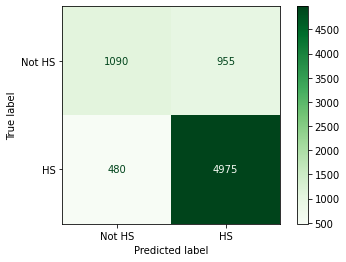

In [ ]:
import matplotlib.pyplot as plt

plot_confusion_matrix(modelSVM, 
                      vect_transformed_X_test, 
                      y_test, 
                      display_labels=["Not HS", "HS"],
                      cmap='Greens')
plt.show()

In [ ]:
TN = confusion_matrix_SVM[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_SVM[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_SVM[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_SVM[1,1]
print("True Positives = ", TP)

True Negatives =  1090
False Negatives =  480
False Positives =  955
True Positives =  4975


In [ ]:
accuracy_SVM = np.round(accuracy_score(y_test, 
                           predictionsSVM), 2)
precision_SVM = np.round(precision_score(y_test, 
                                      predictionsSVM), 2)
recall_SVM= np.round(recall_score(y_test, 
                                predictionsSVM), 2)
f1_score_SVM = np.round(f1_score(y_test, 
                               predictionsSVM), 2)


print('Accuracy = ', np.round(accuracy_SVM*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_SVM*100, 2),"%") #Higher Better
print("Recall = ", recall_SVM*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_SVM*100, 2),"%") #Higher Better

Accuracy =  81.0 %
Precision =  84.0 %
Recall =  91.0 %
f1 score =  87.0 %


In [ ]:
print(classification_report(y_test, predictionsSVM))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60      2045
           1       0.84      0.91      0.87      5455

    accuracy                           0.81      7500
   macro avg       0.77      0.72      0.74      7500
weighted avg       0.80      0.81      0.80      7500



In [ ]:
roc_auc_score(y_test, modelSVM.predict_proba(vect_transformed_X_test)[:, 1])

0.844332894834151

In [ ]:
y = pd.DataFrame()

In [ ]:
y['probability'] = modelSVM.predict_proba(vect_transformed_X_test)[:, 1]

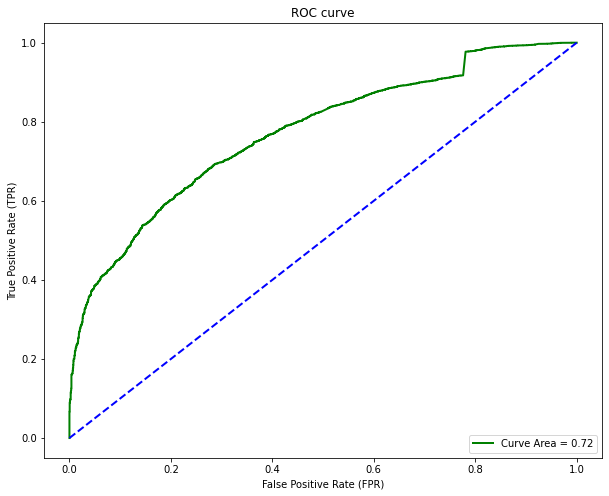

In [ ]:
import numpy as np

FPR, TPR, thr = roc_curve(y_test, 
                          y['probability'])
auc_SVM = np.round(roc_auc_score(y_test, 
                             predictionsSVM), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_lr))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,2.000000,0.0,0.000000
1,1.000000,0.0,0.006783
2,1.000000,0.0,0.007149
3,0.999999,0.0,0.009533
4,0.999999,0.0,0.009899


#### Grid Search and Cross Validation

In [ ]:
from sklearn import svm

modelSVC = svm.SVC(C=100, probability=True)
print(modelSVC.get_params().keys())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import svm

grid_values = {'classifier__C':[1, 10, 100],
              'classifier__gamma':[0.001, 0.0001]}


steps=[('classifier', SVC(decision_function_shape="ovo", 
                               degree=3, 
                               gamma="auto", 
                               kernel='rbf', max_iter=-1, 
                               probability=True, 
                               random_state=None, 
                               shrinking=True, tol=0.001, verbose=False))]

pipeline = Pipeline(steps)

# from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline,
                           param_grid = grid_values,
                           scoring="f1_weighted",
                           cv=2)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(vect_transformed_X_train,y_train)

In [ ]:
# predictionsKNN = modelKNN.predict(vect_transformed_X_test)
y_pred = grid_result.predict(vect_transformed_X_test)

In [ ]:
#Best hyperparameters in the grid search
grid_result.best_params_

{'classifier__C': 100, 'classifier__gamma': 0.001}

In [ ]:
grid_result.cv_results_

{'mean_fit_time': array([70.14309704, 58.57478595, 79.3510462 , 70.07683015, 83.17769969,
        79.46361303]),
 'std_fit_time': array([0.250929  , 0.67251658, 1.07015216, 0.59234071, 0.89375699,
        1.1038034 ]),
 'mean_score_time': array([13.97859526, 11.9508456 , 15.69548619, 14.17210412, 15.94011366,
        15.44197094]),
 'std_score_time': array([0.22879672, 0.08106363, 0.27981198, 0.07612705, 0.21178925,
        0.40428984]),
 'param_classifier__C': masked_array(data=[1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_classifier__gamma': masked_array(data=[0.001, 0.0001, 0.001, 0.0001, 0.001, 0.0001],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'classifier__C': 1, 'classifier__gamma': 0.001},
  {'classifier__C': 1, 'classifier__gamma': 0.0001},
  {'classifier__C': 10, 'classifier__gamma': 0.001},

In [ ]:
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,70.143097,0.250929,13.978595,0.228797,1,0.001,"{'classifier__C': 1, 'classifier__gamma': 0.001}",0.618853,0.618853,0.618853,0.000000,2
1,58.574786,0.672517,11.950846,0.081064,1,0.0001,"{'classifier__C': 1, 'classifier__gamma': 0.0001}",0.618853,0.618853,0.618853,0.000000,2
2,79.351046,1.070152,15.695486,0.279812,10,0.001,"{'classifier__C': 10, 'classifier__gamma': 0.001}",0.618853,0.618853,0.618853,0.000000,2
3,70.076830,0.592341,14.172104,0.076127,10,0.0001,"{'classifier__C': 10, 'classifier__gamma': 0.0...",0.618853,0.618853,0.618853,0.000000,2
4,83.177700,0.893757,15.940114,0.211789,100,0.001,"{'classifier__C': 100, 'classifier__gamma': 0....",0.651628,0.650149,0.650889,0.000739,1
5,79.463613,1.103803,15.441971,0.404290,100,0.0001,"{'classifier__C': 100, 'classifier__gamma': 0....",0.618853,0.618853,0.618853,0.000000,2


In [ ]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['split0_test_score',
                       'split1_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
4,0.651628,0.650149,0.650889,0.000739,1
0,0.618853,0.618853,0.618853,0.000000,2
1,0.618853,0.618853,0.618853,0.000000,2
2,0.618853,0.618853,0.618853,0.000000,2
3,0.618853,0.618853,0.618853,0.000000,2
5,0.618853,0.618853,0.618853,0.000000,2


Index(['split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
confusion_matrix_svm_gscv = confusion_matrix(y_test, 
                                     y_pred)

print('confusion_matrix: \n', confusion_matrix_svm_gscv)

confusion_matrix: 
 [[ 533 1512]
 [ 162 5293]]


In [ ]:
# confusion_matrix_knn_gscv = confusion_matrix(aa, bb)
# print('confusion_matrix: \n', confusion_matrix_knn_gscv)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


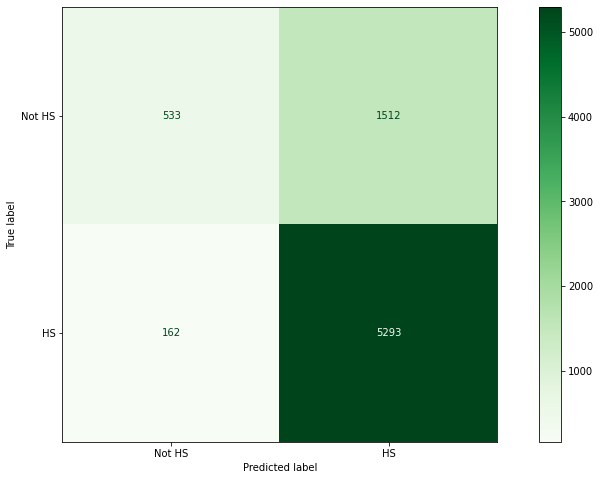

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(grid_result,
                      vect_transformed_X_test, 
                      y_test, 
                      display_labels=["Not HS", "HS"],
                      cmap='Greens',
                     ax = ax)
plt.show()

In [ ]:
TN_svm_gscv = confusion_matrix_svm_gscv[0,0]
print("True Negatives = ", TN_svm_gscv)

FN_svm_gscv = confusion_matrix_svm_gscv[1,0]
print("False Negatives = ", FN_svm_gscv)

FP_svm_gscv = confusion_matrix_svm_gscv[0,1]
print("False Positives = ", FP_svm_gscv)

TP_svm_gscv = confusion_matrix_svm_gscv[1,1]
print("True Positives = ", TP_svm_gscv)

True Negatives =  533
False Negatives =  162
False Positives =  1512
True Positives =  5293


In [ ]:
accuracy_svm_gscv = np.round(accuracy_score(y_test, 
                           y_pred), 2)
precision_svm_gscv = np.round(precision_score(y_test, 
                                      y_pred), 2)
recall_svm_gscv = np.round(recall_score(y_test, 
                                y_pred), 2)
f1_score_svm_gscv = np.round(f1_score(y_test, 
                               y_pred), 2)


print('Accuracy = ', np.round(accuracy_svm_gscv*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_svm_gscv*100, 2),"%") #Higher Better
print("Recall = ", recall_svm_gscv*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_svm_gscv*100, 2),"%") #Higher Better

Accuracy =  78.0 %
Precision =  78.0 %
Recall =  97.0 %
f1 score =  86.0 %


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.26      0.39      2045
           1       0.78      0.97      0.86      5455

    accuracy                           0.78      7500
   macro avg       0.77      0.62      0.63      7500
weighted avg       0.77      0.78      0.73      7500



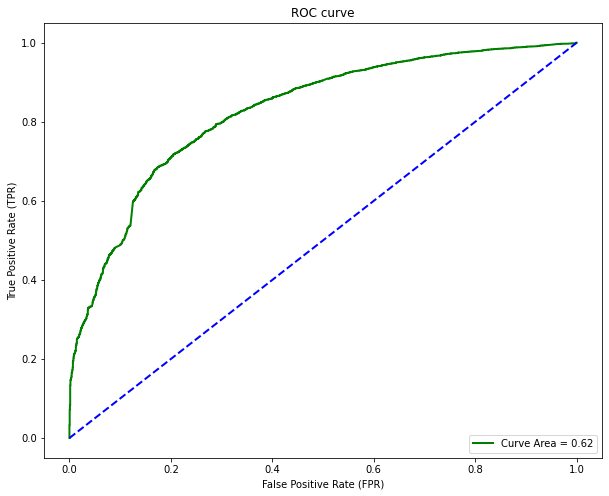

In [ ]:
FPR, TPR, thr = roc_curve(y_test, grid_result.predict_proba(vect_transformed_X_test)[:,1])

auc_svm_gscv = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_svm_gscv))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,1.999997,0.0,0.000000
1,0.999997,0.0,0.006783
2,0.996054,0.0,0.006966
3,0.995660,0.0,0.007333
4,0.995380,0.0,0.008066


## KNN

#### Basic KNN

In [ ]:
#Import Random Forest Model
from sklearn.neighbors import KNeighborsClassifier

# #
# model= KNeighborsClassifier(n_neighbors=5)

# model = model.fit(X_knn_train, y_knn_train)


modelKNN = KNeighborsClassifier(n_neighbors=5).fit(vect_transformed_X_train,y_train)

In [ ]:
predictionsKNN = modelKNN.predict(vect_transformed_X_test)

In [ ]:
sum(predictionsKNN==1)

7201

In [ ]:
len(y_test)

7500

In [ ]:
confusion_matrix_knn = confusion_matrix(y_test, 
                          predictionsKNN)

print('confusion_matrix: \n', confusion_matrix_knn)

confusion_matrix: 
 [[ 176 1869]
 [ 123 5332]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


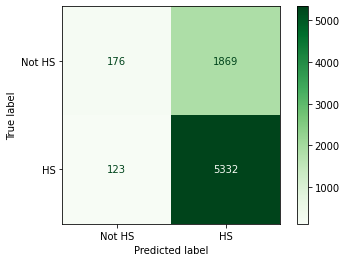

In [ ]:
import matplotlib.pyplot as plt

plot_confusion_matrix(modelKNN, 
                      vect_transformed_X_test, 
                      y_test, 
                      display_labels=["Not HS", "HS"],
                      cmap='Greens')
plt.show()

In [ ]:
TN = confusion_matrix_knn[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_knn[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_knn[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_knn[1,1]
print("True Positives = ", TP)

True Negatives =  176
False Negatives =  123
False Positives =  1869
True Positives =  5332


In [ ]:
accuracy_KNN = np.round(accuracy_score(y_test, 
                           predictionsKNN), 2)
precision_KNN = np.round(precision_score(y_test, 
                                      predictionsKNN), 2)
recall_KNN= np.round(recall_score(y_test, 
                                predictionsKNN), 2)
f1_score_KNN = np.round(f1_score(y_test, 
                               predictionsKNN), 2)


print('Accuracy = ', np.round(accuracy_KNN*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_KNN*100, 2),"%") #Higher Better
print("Recall = ", recall_KNN*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_KNN*100, 2),"%") #Higher Better

Accuracy =  73.0 %
Precision =  74.0 %
Recall =  98.0 %
f1 score =  84.0 %


In [ ]:
print(classification_report(y_test, predictionsKNN))

              precision    recall  f1-score   support

           0       0.59      0.09      0.15      2045
           1       0.74      0.98      0.84      5455

    accuracy                           0.73      7500
   macro avg       0.66      0.53      0.50      7500
weighted avg       0.70      0.73      0.65      7500



In [ ]:
roc_auc_score(y_test, modelKNN.predict_proba(vect_transformed_X_test)[:, 1])

y = pd.DataFrame()

y['probability'] = modelKNN.predict_proba(vect_transformed_X_test)[:, 1]

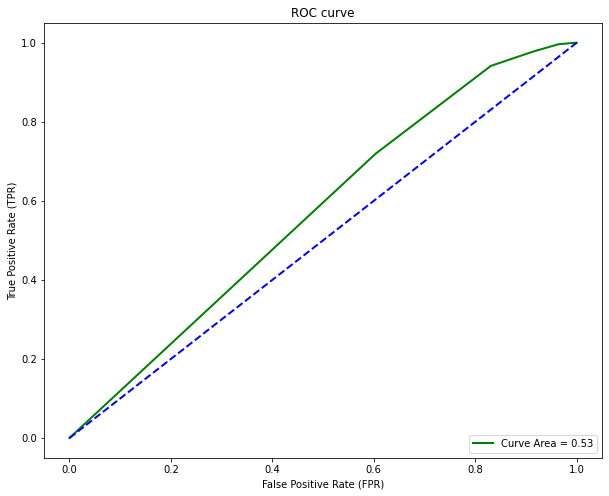

In [ ]:
import numpy as np

FPR, TPR, thr = roc_curve(y_test, 
                          y['probability'])
auc_KNN = np.round(roc_auc_score(y_test, 
                             predictionsKNN), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_KNN))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,2.0,0.000000,0.000000
1,1.0,0.603423,0.718973
2,0.8,0.830807,0.941338
3,0.6,0.913936,0.977452
4,0.4,0.963814,0.995967


#### Grid Search and Cross Validation

In [ ]:
#Import Random Forest Model
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=5)
print(modelKNN.get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [ ]:
# https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

parameters = {'n_neighbors': [19],
              'leaf_size': [1]}


from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=modelKNN,
                           param_grid=parameters,
                           scoring="f1_weighted",
                           cv=10,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(vect_transformed_X_train,y_train)

In [ ]:
# predictionsKNN = modelKNN.predict(vect_transformed_X_test)
y_pred = grid_result.predict(vect_transformed_X_test)

In [ ]:
#Best hyperparameters in the grid search
grid_result.best_params_

{'leaf_size': 1, 'n_neighbors': 19}

In [ ]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.626668,0.630167,0.629996,0.62304,0.621117,0.626769,0.003323,1


Index(['split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [ ]:
confusion_matrix_knn_gscv = confusion_matrix(y_test, 
                                     y_pred)

print('confusion_matrix: \n', confusion_matrix_knn_gscv)

confusion_matrix: 
 [[  34 2011]
 [  10 5445]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


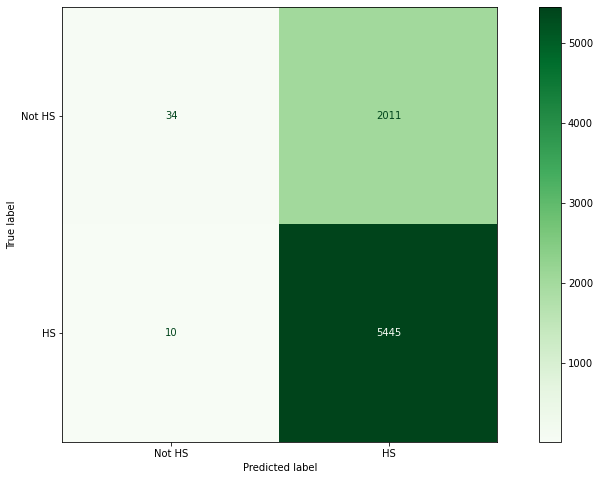

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(grid_result,
                      vect_transformed_X_test, 
                      y_test, 
                      display_labels=["Not HS", "HS"],
                      cmap='Greens',
                     ax = ax)
plt.show()

In [ ]:
TN_knn_gscv = confusion_matrix_knn_gscv[0,0]
print("True Negatives = ", TN_knn_gscv)

FN_knn_gscv = confusion_matrix_knn_gscv[1,0]
print("False Negatives = ", FN_knn_gscv)

FP_knn_gscv = confusion_matrix_knn_gscv[0,1]
print("False Positives = ", FP_knn_gscv)

TP_knn_gscv = confusion_matrix_knn_gscv[1,1]
print("True Positives = ", TP_knn_gscv)

True Negatives =  34
False Negatives =  10
False Positives =  2011
True Positives =  5445


In [ ]:
accuracy_knn_gscv = np.round(accuracy_score(y_test, 
                           y_pred), 2)
precision_knn_gscv = np.round(precision_score(y_test, 
                                      y_pred), 2)
recall_knn_gscv = np.round(recall_score(y_test, 
                                y_pred), 2)
f1_score_knn_gscv = np.round(f1_score(y_test, 
                               y_pred), 2)


print('Accuracy = ', np.round(accuracy_knn_gscv*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_knn_gscv*100, 2),"%") #Higher Better
print("Recall = ", recall_knn_gscv*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_knn_gscv*100, 2),"%") #Higher Better

Accuracy =  73.0 %
Precision =  73.0 %
Recall =  100.0 %
f1 score =  84.0 %


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.02      0.03      2045
           1       0.73      1.00      0.84      5455

    accuracy                           0.73      7500
   macro avg       0.75      0.51      0.44      7500
weighted avg       0.74      0.73      0.62      7500



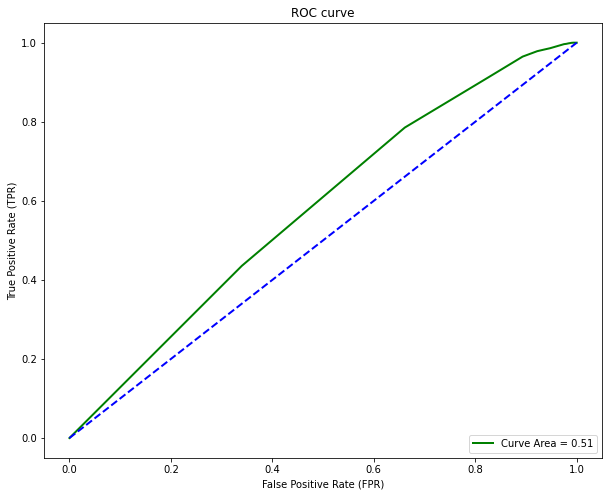

In [ ]:
FPR, TPR, thr = roc_curve(y_test, grid_result.predict_proba(vect_transformed_X_test)[:,1])

auc_knn_gscv = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_knn_gscv))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,2.000000,0.000000,0.000000
1,1.000000,0.339853,0.435564
2,0.947368,0.661125,0.785335
3,0.894737,0.824939,0.911641
4,0.842105,0.893399,0.964803


## NB

#### Basic NB

In [ ]:
# vect_transformed_X_train.toarray()

In [ ]:
# #Import Random Forest Model
# from sklearn.ensemble import RandomForestClassifier

# modelGNB = RandomForestClassifier(n_estimators=100, max_depth=40,
#                                min_samples_leaf=50,
#                                n_jobs=-1, class_weight='balanced',
#                                random_state=50)
# import sklearn.linear_model as lm
# modelGNB = lm.LogisticRegression()
# modelGNB = modelGNB.fit(vect_transformed_X_train, y_train)
modelNB = MultinomialNB().fit(vect_transformed_X_train, y_train)

In [ ]:
predictionsNB = modelNB.predict(vect_transformed_X_test)

In [ ]:
sum(predictionsNB==1)

7412

In [ ]:
len(y_test)

7500

In [ ]:
confusion_matrix_NB = confusion_matrix(y_test, 
                          predictionsNB)

print('confusion_matrix: \n', confusion_matrix_NB)

confusion_matrix: 
 [[  82 1963]
 [   6 5449]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


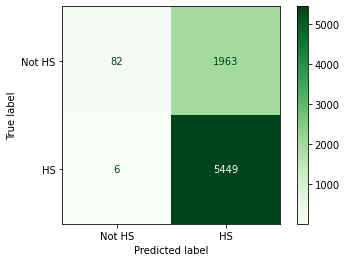

In [ ]:
import matplotlib.pyplot as plt

plot_confusion_matrix(modelNB, 
                      vect_transformed_X_test, 
                      y_test, 
                      display_labels=["Not HS", "HS"],
                      cmap='Greens')
plt.show()

In [ ]:
TN = confusion_matrix_NB[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_NB[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_NB[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_NB[1,1]
print("True Positives = ", TP)

True Negatives =  82
False Negatives =  6
False Positives =  1963
True Positives =  5449


In [ ]:
accuracy_NB = np.round(accuracy_score(y_test, 
                           predictionsNB), 2)
precision_NB = np.round(precision_score(y_test, 
                                      predictionsNB), 2)
recall_NB= np.round(recall_score(y_test, 
                                predictionsNB), 2)
f1_score_NB = np.round(f1_score(y_test, 
                               predictionsNB), 2)


print('Accuracy = ', np.round(accuracy_NB*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_NB*100, 2),"%") #Higher Better
print("Recall = ", recall_NB*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_NB*100, 2),"%") #Higher Better

Accuracy =  74.0 %
Precision =  74.0 %
Recall =  100.0 %
f1 score =  85.0 %


In [ ]:
print(classification_report(y_test, predictionsNB))

              precision    recall  f1-score   support

           0       0.93      0.04      0.08      2045
           1       0.74      1.00      0.85      5455

    accuracy                           0.74      7500
   macro avg       0.83      0.52      0.46      7500
weighted avg       0.79      0.74      0.64      7500



In [ ]:
roc_auc_score(y_test, modelNB.predict_proba(vect_transformed_X_test)[:, 1])

y = pd.DataFrame()

y['probability'] = modelNB.predict_proba(vect_transformed_X_test)[:, 1]

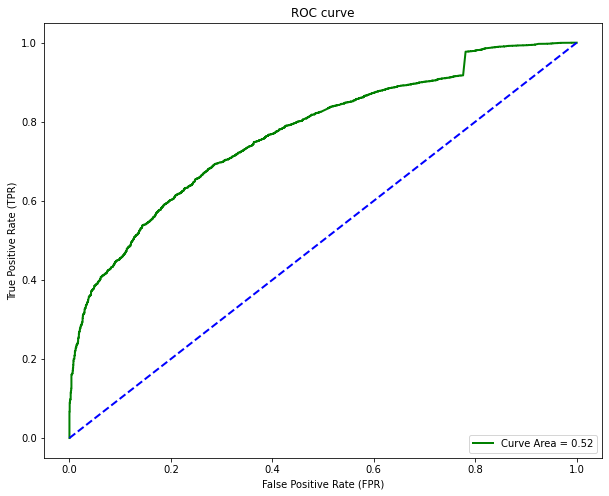

In [ ]:
import numpy as np

FPR, TPR, thr = roc_curve(y_test, 
                          y['probability'])
auc_NB = np.round(roc_auc_score(y_test, 
                             predictionsNB), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_NB))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,1.999995,0.0,0.000000
1,0.999995,0.0,0.000183
2,0.999976,0.0,0.000733
3,0.999959,0.0,0.001100
4,0.999955,0.0,0.001283


#### Grid Search and Cross Validation

In [ ]:
modelNB = MultinomialNB()
print(modelNB.get_params().keys())

dict_keys(['alpha', 'class_prior', 'fit_prior'])


In [ ]:
# https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

parameters = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* 2, ]}


from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=modelNB,
                           param_grid=parameters,
                           scoring="f1_weighted",
                           cv=10,
                           n_jobs=-1, 
                           verbose=5)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(vect_transformed_X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


In [ ]:
# predictionsKNN = modelKNN.predict(vect_transformed_X_test)
y_pred = grid_result.predict(vect_transformed_X_test)

In [ ]:
#Best hyperparameters in the grid search
grid_result.best_params_

{'alpha': 0.1, 'class_prior': None, 'fit_prior': True}

In [ ]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.753366,0.759993,0.742381,0.753402,0.771051,0.758277,0.009219,1
9,0.751249,0.747328,0.728232,0.745179,0.765913,0.750080,0.009788,2
11,0.751249,0.747328,0.728232,0.745179,0.765913,0.750080,0.009788,2
10,0.751249,0.747328,0.728232,0.745179,0.765913,0.750080,0.009788,2
0,0.730567,0.727685,0.723505,0.722220,0.740264,0.727817,0.006748,5
13,0.733647,0.715515,0.713055,0.717015,0.730328,0.725286,0.007408,6
14,0.733647,0.715515,0.713055,0.717015,0.730328,0.725286,0.007408,6
15,0.733647,0.715515,0.713055,0.717015,0.730328,0.725286,0.007408,6
8,0.670792,0.671011,0.671623,0.660438,0.653264,0.670532,0.007987,9
5,0.683869,0.671545,0.655357,0.656551,0.675840,0.667566,0.008506,10


Index(['split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [ ]:
confusion_matrix_NB_gscv = confusion_matrix(y_test, 
                                     y_pred)

print('confusion_matrix: \n', confusion_matrix_NB_gscv)

confusion_matrix: 
 [[ 620 1425]
 [ 218 5237]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


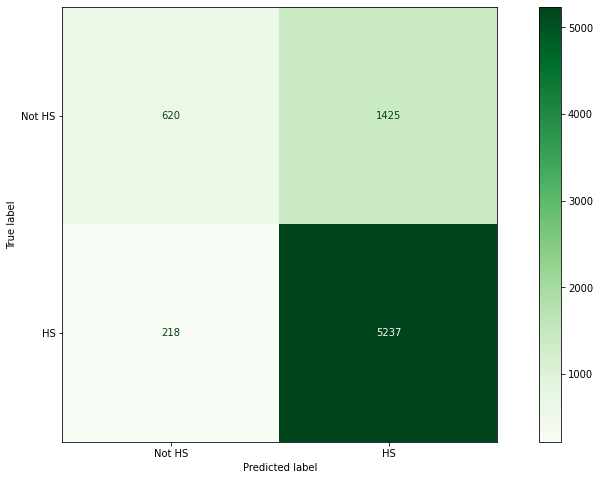

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(grid_result,
                      vect_transformed_X_test, 
                      y_test, 
                      display_labels=["Not HS", "HS"],
                      cmap='Greens',
                     ax = ax)
plt.show()

In [ ]:
TN_NB_gscv = confusion_matrix_NB_gscv[0,0]
print("True Negatives = ", TN_NB_gscv)

FN_NB_gscv = confusion_matrix_NB_gscv[1,0]
print("False Negatives = ", FN_NB_gscv)

FP_NB_gscv = confusion_matrix_NB_gscv[0,1]
print("False Positives = ", FP_NB_gscv)

TP_NB_gscv = confusion_matrix_NB_gscv[1,1]
print("True Positives = ", TP_NB_gscv)

True Negatives =  620
False Negatives =  218
False Positives =  1425
True Positives =  5237


In [ ]:
accuracy_NB_gscv = np.round(accuracy_score(y_test, 
                           y_pred), 2)
precision_NB_gscv = np.round(precision_score(y_test, 
                                      y_pred), 2)
recall_NB_gscv = np.round(recall_score(y_test, 
                                y_pred), 2)
f1_score_NB_gscv = np.round(f1_score(y_test, 
                               y_pred), 2)


print('Accuracy = ', np.round(accuracy_NB_gscv*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_NB_gscv*100, 2),"%") #Higher Better
print("Recall = ", recall_NB_gscv*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_NB_gscv*100, 2),"%") #Higher Better

Accuracy =  78.0 %
Precision =  79.0 %
Recall =  96.0 %
f1 score =  86.0 %


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.30      0.43      2045
           1       0.79      0.96      0.86      5455

    accuracy                           0.78      7500
   macro avg       0.76      0.63      0.65      7500
weighted avg       0.77      0.78      0.75      7500



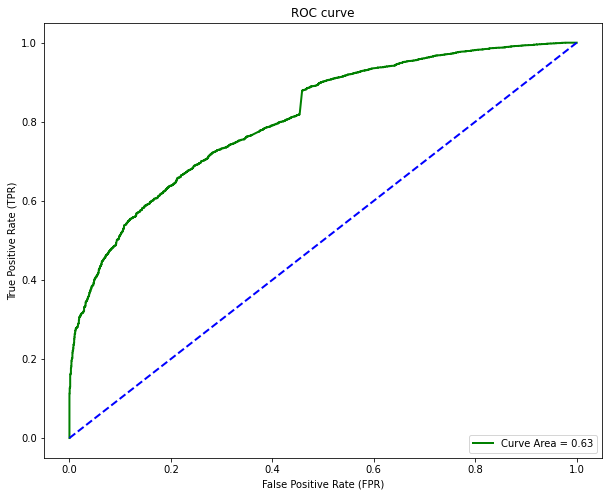

In [ ]:
FPR, TPR, thr = roc_curve(y_test, grid_result.predict_proba(vect_transformed_X_test)[:,1])

auc_NB_gscv = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_NB_gscv))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,2.0,0.0,0.000000
1,1.0,0.0,0.000183
2,1.0,0.0,0.000733
3,1.0,0.0,0.001100
4,1.0,0.0,0.001467


## Ensemble Model Training

In [ ]:
# Bagged Decision Trees for Classification - necessary dependencies

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold

### AdaBoost Classification

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# model=SVC(probability=True, kernel='linear')
model = LogisticRegression()

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=model,learning_rate=1)

# Train Adaboost Classifer
modelABC = abc.fit(vect_transformed_X_train,y_train)

**Performance metrics**

In [ ]:
# Predict the response for test dataset
y_predABC = modelABC.predict(vect_transformed_X_test)

# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))
# print("F1:",metrics.f1_score(y_test, y_pred))

In [ ]:
confusion_matrix_ABC = confusion_matrix(y_test, 
                          y_predABC)

print('confusion_matrix: \n', confusion_matrix_ABC)

confusion_matrix: 
 [[   0 2045]
 [   0 5455]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


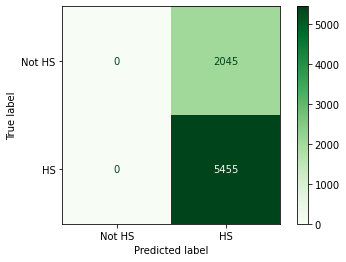

In [ ]:
import matplotlib.pyplot as plt

plot_confusion_matrix(modelABC, 
                      vect_transformed_X_test, 
                      y_test, 
                      display_labels=["Not HS", "HS"],
                      cmap='Greens')
plt.show()

In [ ]:
TN = confusion_matrix_ABC[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_ABC[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_ABC[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_ABC[1,1]
print("True Positives = ", TP)

True Negatives =  0
False Negatives =  0
False Positives =  2045
True Positives =  5455


In [ ]:
accuracy_ABC = np.round(metrics.accuracy_score(y_test, y_predABC), 2)
precision_ABC = np.round(metrics.precision_score(y_test, y_predABC), 2)
recall_ABC= np.round(metrics.recall_score(y_test, y_predABC), 2)
f1_score_ABC = np.round(metrics.f1_score(y_test, y_predABC), 2)

print('Accuracy = ', np.round(accuracy_ABC*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_ABC*100, 2),"%") #Higher Better
print("Recall = ", recall_ABC*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_ABC*100, 2),"%") #Higher Better

Accuracy =  73.0 %
Precision =  73.0 %
Recall =  100.0 %
f1 score =  84.0 %


In [ ]:
roc_auc_score(y_test,  modelABC.predict_proba(vect_transformed_X_test)[:, 1])

0.8095686647139633

In [ ]:
auc_ABC = np.round(roc_auc_score(y_test,  modelABC.predict_proba(vect_transformed_X_test)[:, 1]), 2)
auc_ABC

0.81

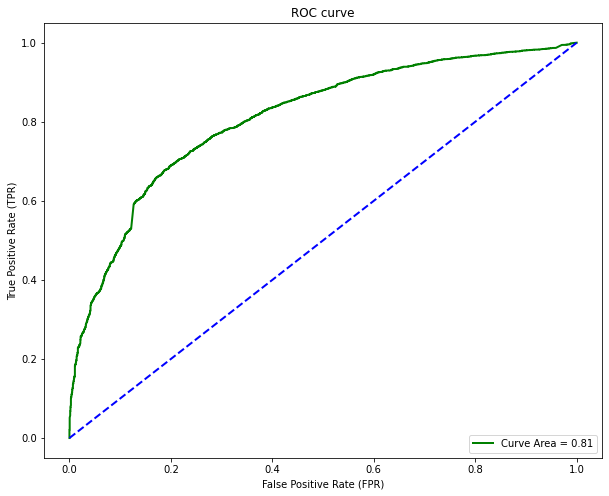

In [ ]:
FPR, TPR, thr = roc_curve(y_test,  modelABC.predict_proba(vect_transformed_X_test)[:,1])

auc_ABC = np.round(roc_auc_score(y_test,  modelABC.predict_proba(vect_transformed_X_test)[:, 1]), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_ABC))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classification_report(y_test, y_predABC))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2045
           1       0.73      1.00      0.84      5455

    accuracy                           0.73      7500
   macro avg       0.36      0.50      0.42      7500
weighted avg       0.53      0.73      0.61      7500



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,1.506235,0.0,0.000000
1,0.506235,0.0,0.006783
2,0.505925,0.0,0.007149
3,0.505743,0.0,0.007699
4,0.505719,0.0,0.008433


### Voting Ensemble for Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
seed = 7
from sklearn import metrics

estimators = []

model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(probability=True)
estimators.append(('svm', model3))

#### VNC Hard

In [ ]:
# create the ensemble model
ensemble1 = VotingClassifier(estimators)

# Train Adaboost Classifer
modelVNC1 = ensemble1.fit(vect_transformed_X_train,y_train)

**Performance metrics**

In [ ]:
# Predict the response for test dataset
y_predVNC1 = modelVNC1.predict(vect_transformed_X_test)

# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))
# print("F1:",metrics.f1_score(y_test, y_pred))

In [ ]:
confusion_matrix_VNC1 = confusion_matrix(y_test, 
                          y_predVNC1)

print('confusion_matrix: \n', confusion_matrix_VNC1)

confusion_matrix: 
 [[ 971 1074]
 [ 370 5085]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


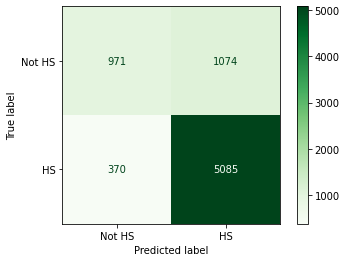

In [ ]:
import matplotlib.pyplot as plt

plot_confusion_matrix(modelVNC1, 
                      vect_transformed_X_test, 
                      y_test, 
                      display_labels=["Not HS", "HS"],
                      cmap='Greens')
plt.show()

In [ ]:
TN = confusion_matrix_VNC1[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_VNC1[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_VNC1[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_VNC1[1,1]
print("True Positives = ", TP)

True Negatives =  971
False Negatives =  370
False Positives =  1074
True Positives =  5085


In [ ]:
accuracy_VNC1 = np.round(metrics.accuracy_score(y_test, y_predVNC1), 2)
precision_VNC1 = np.round(metrics.precision_score(y_test, y_predVNC1), 2)
recall_VNC1= np.round(metrics.recall_score(y_test, y_predVNC1), 2)
f1_score_VNC1 = np.round(metrics.f1_score(y_test, y_predVNC1), 2)

print('Accuracy = ', np.round(accuracy_VNC1*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_VNC1*100, 2),"%") #Higher Better
print("Recall = ", recall_VNC1*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_VNC1*100, 2),"%") #Higher Better

Accuracy =  81.0 %
Precision =  83.0 %
Recall =  93.0 %
f1 score =  88.0 %


In [ ]:
print(classification_report(y_test, y_predVNC1))

              precision    recall  f1-score   support

           0       0.72      0.47      0.57      2045
           1       0.83      0.93      0.88      5455

    accuracy                           0.81      7500
   macro avg       0.77      0.70      0.72      7500
weighted avg       0.80      0.81      0.79      7500



#### VNC Soft

In [ ]:
# create the ensemble model
ensemble2 = VotingClassifier(estimators, voting = 'soft')

# Train Adaboost Classifer
modelVNC2 = ensemble2.fit(vect_transformed_X_train,y_train)

In [ ]:
# Predict the response for test dataset
y_predVNC2 = modelVNC2.predict(vect_transformed_X_test)

In [ ]:
confusion_matrix_VNC2 = confusion_matrix(y_test, 
                          y_predVNC2)

print('confusion_matrix: \n', confusion_matrix_VNC2)

confusion_matrix: 
 [[1098  947]
 [ 623 4832]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


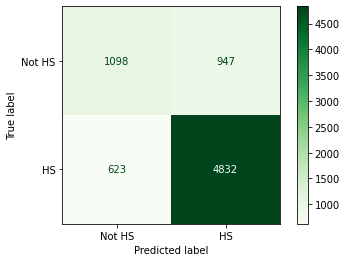

In [ ]:
import matplotlib.pyplot as plt

plot_confusion_matrix(modelVNC2, 
                      vect_transformed_X_test, 
                      y_test, 
                      display_labels=["Not HS", "HS"],
                      cmap='Greens')
plt.show()

In [ ]:
TN_VNC2 = confusion_matrix_VNC2[0,0]
print("True Negatives = ", TN_VNC2)

FN_VNC2 = confusion_matrix_VNC2[1,0]
print("False Negatives = ", FN_VNC2)

FP_VNC2 = confusion_matrix_VNC2[0,1]
print("False Positives = ", FP_VNC2)

TP_VNC2 = confusion_matrix_VNC2[1,1]
print("True Positives = ", TP_VNC2)

True Negatives =  1098
False Negatives =  623
False Positives =  947
True Positives =  4832


In [ ]:
TPR = np.round(TP_VNC2 / (TP_VNC2 + FN_VNC2), 2)
TNR = np.round(TN_VNC2 / (TN_VNC2 + FP_VNC2), 2)
FPR = np.round(FP_VNC2 / (FP_VNC2 + TN_VNC2), 2)
FNR = np.round(FN_VNC2 / (FP_VNC2 + TN_VNC2), 2)
 
print("True Positive Rate = ", TPR*100,"%") #Higher Better
print("True Negative Rate = ", TNR*100,"%")
print("False Positive Rate = ", FPR*100,"%") # Lower Better
print("False Negative Rate = ", FNR*100,"%")

True Positive Rate =  89.0 %
True Negative Rate =  54.0 %
False Positive Rate =  46.0 %
False Negative Rate =  30.0 %


In [ ]:
accuracy_VNC2 = np.round(metrics.accuracy_score(y_test, y_predVNC2), 2)
precision_VNC2 = np.round(metrics.precision_score(y_test, y_predVNC2), 2)
recall_VNC2= np.round(metrics.recall_score(y_test, y_predVNC2), 2)
f1_score_VNC2 = np.round(metrics.f1_score(y_test, y_predVNC2), 2)

print('Accuracy = ', np.round(accuracy_VNC2*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_VNC2*100, 2),"%") #Higher Better
print("Recall = ", recall_VNC2*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_VNC2*100, 2),"%") #Higher Better

Accuracy =  79.0 %
Precision =  84.0 %
Recall =  89.0 %
f1 score =  86.0 %


In [ ]:
print(classification_report(y_test, y_predVNC2))

              precision    recall  f1-score   support

           0       0.64      0.54      0.58      2045
           1       0.84      0.89      0.86      5455

    accuracy                           0.79      7500
   macro avg       0.74      0.71      0.72      7500
weighted avg       0.78      0.79      0.78      7500



In [ ]:
roc_auc_score(y_test, modelVNC2.predict_proba(vect_transformed_X_test)[:, 1])

0.8394052247887248

In [ ]:
auc_VNC2 = np.round(roc_auc_score(y_test, modelVNC2.predict_proba(vect_transformed_X_test)[:, 1]), 2)
auc_VNC2

0.84

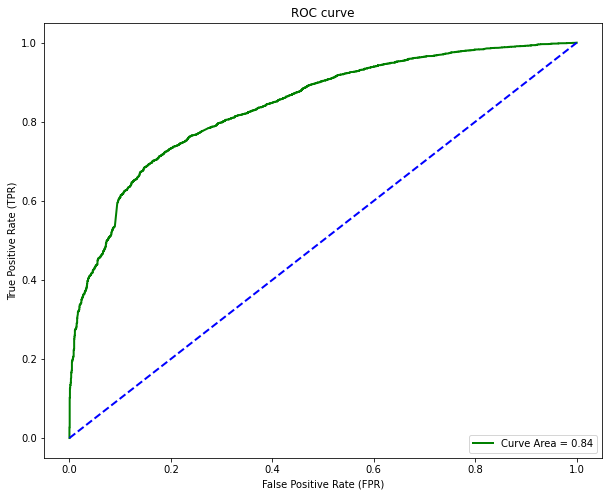

In [ ]:
FPR, TPR, thr = roc_curve(y_test, modelVNC2.predict_proba(vect_transformed_X_test)[:,1])

auc_VNC = np.round(roc_auc_score(y_test, modelVNC2.predict_proba(vect_transformed_X_test)[:, 1]), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_VNC))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,1.999984,0.0,0.000000
1,0.999984,0.0,0.006783
2,0.999842,0.0,0.006966
3,0.999824,0.0,0.007333
4,0.999752,0.0,0.008066


# Result

In [ ]:
# accuracy_SVM_gscv = 0
# precision_SVM_gscv = 0
# recall_SVM_gscv = 0
# f1_score_SVM_gscv = 0
# auc_SVM_gscv = 0
auc_VNC1 = 0

In [ ]:
accuracy_KNN_gscv = accuracy_knn_gscv
precision_KNN_gscv = precision_knn_gscv
recall_KNN_gscv = recall_knn_gscv
f1_score_KNN_gscv = f1_score_knn_gscv
auc_KNN_gscv = auc_knn_gscv

In [ ]:
result_data = {'Models':['LR', 'LR_gscv', 'SVM', 'SVM_gscv', 'KNN', 'KNN_gscv', 'NB', 'NB_gscv', 'ABC', 'VNC-Hard', 'VNC-Soft'],
        'Accuracy': [np.round(accuracy_LR*100, 2), np.round(accuracy_LR_gscv*100, 2), np.round(accuracy_SVM*100, 2), np.round(accuracy_svm_gscv*100, 2), np.round(accuracy_KNN*100, 2), np.round(accuracy_KNN_gscv*100, 2), np.round(accuracy_NB*100, 2), np.round(accuracy_NB_gscv*100, 2), np.round(accuracy_ABC*100, 2), np.round(accuracy_VNC1*100, 2), np.round(accuracy_VNC2*100, 2)],
        'Precision': [np.round(precision_LR*100, 2), np.round(precision_LR_gscv*100, 2), np.round(precision_SVM*100, 2), np.round(precision_svm_gscv*100, 2), np.round(precision_KNN*100, 2), np.round(precision_KNN_gscv*100, 2), np.round(precision_NB*100, 2), np.round(precision_NB_gscv*100, 2), np.round(precision_ABC*100, 2), np.round(precision_VNC1*100, 2), np.round(precision_VNC2*100, 2)],
        'Recall': [np.round(recall_LR*100, 2), np.round(recall_LR_gscv*100, 2), np.round(recall_SVM*100, 2), np.round(recall_svm_gscv*100, 2), np.round(recall_KNN*100, 2), np.round(recall_KNN_gscv*100, 2), np.round(recall_NB*100, 2), np.round(recall_NB_gscv*100, 2), np.round(recall_ABC*100, 2), np.round(recall_VNC1*100, 2), np.round(recall_VNC2*100, 2)],
        'F1 Score': [np.round(f1_score_LR*100, 2), np.round(f1_score_LR_gscv*100, 2), np.round(f1_score_SVM*100, 2), np.round(f1_score_svm_gscv*100, 2), np.round(f1_score_KNN*100, 2), np.round(f1_score_KNN_gscv*100, 2), np.round(f1_score_NB*100, 2), np.round(f1_score_NB_gscv*100, 2), np.round(f1_score_ABC*100, 2), np.round(f1_score_VNC1*100, 2), np.round(f1_score_VNC2*100, 2)],
        'ROC-AUC': [np.round(auc_lr*100, 2), np.round(auc_LR_gscv*100, 2), np.round(auc_SVM*100, 2), np.round(auc_svm_gscv*100, 2), np.round(auc_KNN*100, 2), np.round(auc_KNN_gscv*100, 2), np.round(auc_NB*100, 2), np.round(auc_NB_gscv*100, 2), np.round(auc_ABC*100, 2), np.round(auc_VNC1*100, 2), np.round(auc_VNC2*100, 2)]}

# Creates pandas DataFrame.
result_df = pd.DataFrame(result_data)

# Display result_df
display(result_df)

,Models,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,LR,80.0,82.0,93.0,87.0,70.0
1,LR_gscv,75.0,75.0,99.0,85.0,55.0
2,SVM,81.0,84.0,91.0,87.0,72.0
3,SVM_gscv,78.0,78.0,97.0,86.0,62.0
4,KNN,73.0,74.0,98.0,84.0,53.0
5,KNN_gscv,73.0,73.0,100.0,84.0,51.0
6,NB,74.0,74.0,100.0,85.0,52.0
7,NB_gscv,78.0,79.0,96.0,86.0,63.0
8,ABC,73.0,73.0,100.0,84.0,81.0
9,VNC-Hard,81.0,83.0,93.0,88.0,0.0


In [ ]:
result_df.to_csv('/content/drive/MyDrive/PR/result_df.csv')

Text(0.5, 0, 'Percent of performance (%)')

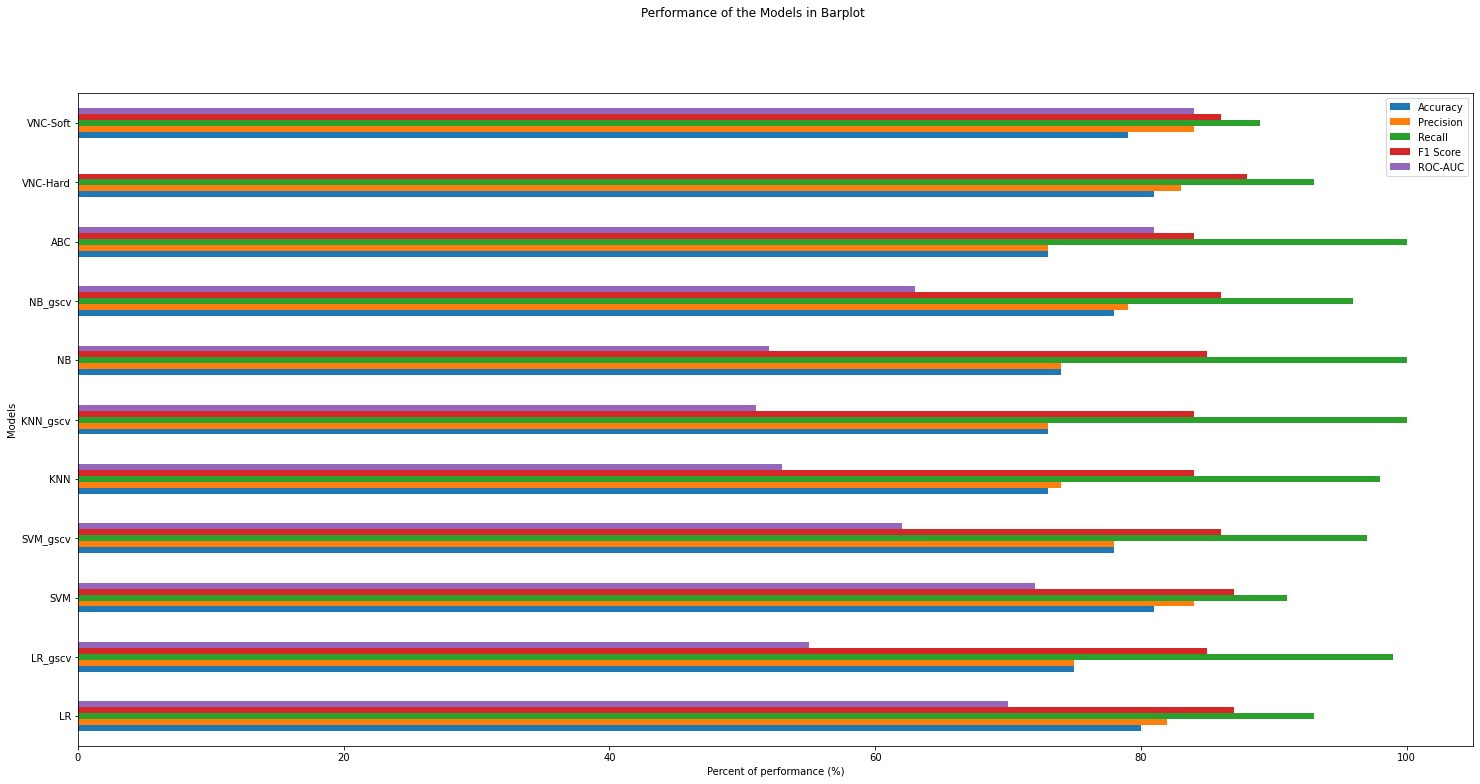

In [ ]:
# importing pandas library
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt
  
# plotting graph
result_df.plot(x="Models", 
               y=["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"], 
               kind="barh", figsize=(25, 12))
plt.suptitle("Performance of the Models in Barplot\n\n\n\n\n\n")
plt.xlabel("Percent of performance (%)")

LR
*   Accuracy =  0.80
*   Precision =  0.82
*   Recall =  0.93
*   f1 score =  0.87
*   auc = 0.70

LR gscv
*   Accuracy =  0.75
*   Precision =  0.75
*   Recall =  0.99
*   f1 score =  0.85
*   auc = 0.55

SVM
*   Accuracy =  0.81
*   Precision =  0.84
*   Recall =  0.91
*   f1 score =  0.87
*   auc = 0.72

SVM gscv
*   Accuracy =  0.78
*   Precision =  0.78
*   Recall =  0.97
*   f1 score =  0.86
*   auc = 0.62

KNN
*   Accuracy =  0.73
*   Precision =  0.74
*   Recall =  0.98
*   f1 score =  0.84
*   auc = 0.54

KNN gscv
*   Accuracy =  0.73
*   Precision =  0.73
*   Recall =  1.00
*   f1 score =  0.84
*   auc = 0.51

NB
*   Accuracy =  0.74
*   Precision =  0.74
*   Recall =  1.00
*   f1 score =  0.85
*   auc = 0.52

NB gscv
*   Accuracy =  0.78
*   Precision =  0.79
*   Recall =  0.96
*   f1 score =  0.86
*   auc = 0.63

ABC
*   Accuracy =  0.73
*   Precision =  0.73
*   Recall =  1.00
*   f1 score =  0.87
*   auc = 0.81

VNC Hard
*   Accuracy =  0.81
*   Precision =  0.83
*   Recall =  0.93
*   f1 score =  0.88
*   auc = -

VNC Soft
*   Accuracy =  0.79
*   Precision =  0.84
*   Recall =  0.89
*   f1 score =  0.86
*   auc = 0.84